# Introduction to Multi Agentic AI

Welcome to this hands-on workshop on Agentic AI systems. In this session, you'll learn how to build an intelligent AI fashion assistant that demonstrates key concepts of agentic behavior.

## What You'll Add

An AI agent that can:
- Generate images with a chosen wardrobe
- Maintain conversation context across multiple interactions

## Learning Objectives

This workshop focuses on building **agents** rather than simple chatbots. By the end, you'll understand how to create AI systems that can:

1. **Take advantage of** human in the loop for feedback.
2. **Make decisions** based on combined data inputs
3. **Talk with other agents** and give feedback
3. **Remember context** across multiple conversation turns
4. **Reason through multi-step processes** to complete complex tasks

## Key Concepts Covered

- Human in the loop
- Multi agentic architectures
- Persistent memory systems
- Graph-based agent architectures

Let's begin by installing the required dependencies:

In [1]:
! pip install -r ./requirements.txt

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ------------------------------------- 981.5/981.5 kB 11.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
INFO: pip is looking at multiple versions of langchain to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 2.5/2.5 MB 48.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 94.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/906.3 kB ? eta -:--:--
   -----

# Quick set up from last workshop.

In [10]:
from langchain_openai import AzureChatOpenAI
import os
import requests

# Set your Azure credentials
os.environ['AZURE_OPENAI_ENDPOINT'] = 'https://evo-bots.openai.azure.com/'
os.environ['AZURE_OPENAI_API_KEY'] = 'SECRET'
os.environ['OPENAI_API_VERSION'] = '2024-12-01-preview'
# Create the LLM
llm = AzureChatOpenAI(
    azure_deployment='gpt-4.1-mini',
    model='gpt-4.1-mini',
    temperature=0.0,
)

messages = [("user", "What's agentic AI?")]
response = llm.invoke(messages)
response.pretty_print()


def get_weather(location: str) -> dict:
    """Get current weather for a specified location.

    Args:
        location: Name of the city or location

    Returns:
        Dictionary containing current temperature, conditions, and chance of rain
    """
    url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/today?unitGroup=metric&include=current&key=QJDGCRHSQ2U7QFVP59UFA5YMJ&contentType=json"

    try:
        response = requests.get(url)
        data = response.json()

        # Extract only the required information
        weather_info = {
            "temperature": data["currentConditions"]["temp"],
            "conditions": data["currentConditions"]["conditions"],
            "chance_of_rain": data["currentConditions"]["precipprob"]
        }

        return weather_info
    except Exception as e:
        return {"error": str(e)}
    
WARDROBE = {
    "Navy Blue Blazer (light, formal cut)": ["wedding", "business"],
    "White Dress Shirt (light, breathable cotton)": ["wedding", "business"],
    "Charcoal Suit Pants (lightweight formal fabric)": ["wedding", "business"],
    "Formal Black Shoes (polished leather)": ["wedding", "business"],
    "Elegant Red Dress (light, satin)": ["wedding", "party"],
    "Black Tie (silk, formal)": ["wedding", "business"],
    "Beige Linen Suit (light, summer style)": ["wedding"],
    "Black Wool Suit (thick, winter)": ["wedding"],
    "Silver Cufflinks (formal accessory)": ["wedding"],
    "Leather Dress Belt (polished black leather)": ["wedding", "business"],
    "Grey Business Suit (medium weight, tailored)": ["business"],
    "Light Blue Oxford Shirt (light cotton)": ["business"],
    "Black Loafers (semi-formal leather shoes)": ["business"],
    "Navy Tie (silk, conservative style)": ["business"],
    "Charcoal Vest (medium weight, formal)": ["business"],
    "Brown Leather Briefcase (accessory)": ["business"],
    "White Cotton Undershirt (light base layer)": ["business"],
    "Black Dress Socks (thin, formal)": ["business"],
    "Black Leather Jacket (thick, edgy style)": ["casual", "party"],
    "Graphic T-Shirt (light, printed design)": ["casual", "party"],
    "Slim-Fit Jeans (dark blue, versatile)": ["casual", "party"],
    "Wool Sweater (thick, warm)": ["casual", "business"],
    "Cargo Pants (medium weight, outdoor style)": ["casual"],
    "Denim Jacket (medium weight, casual)": ["casual"],
    "White Sneakers (casual everyday wear)": ["casual", "party", "gym"],
    "Green Hoodie (medium weight, comfy)": ["casual", "gym"],
    "Canvas Backpack (casual accessory)": ["casual"],
    "Black Silk Shirt (light, shiny fabric)": ["party"],
    "White Skinny Jeans (light, trendy)": ["party"],
    "Sequin Dress (light, sparkly)": ["party"],
    "Leather Chelsea Boots (sleek, ankle-high)": ["party"],
    "Red Velvet Blazer (medium weight, statement piece)": ["party"],
    "Black Chinos (lightweight, smart-casual)": ["party", "casual"],
    "Silver Chain Necklace (bold accessory)": ["party"],
    "Cropped Denim Jacket (light)": ["party", "casual"],
    "High Heels (sleek, black)": ["party"],
    "Running Shorts (light, quick-dry)": ["gym"],
    "Sports Hoodie (medium weight, breathable)": ["gym", "casual"],
    "Performance T-Shirt (light, moisture-wicking)": ["gym"],
    "Compression Leggings (tight fit, flexible)": ["gym"],
    "Track Pants (medium weight, athletic)": ["gym"],
    "Training Shoes (lightweight running shoes)": ["gym"],
    "Sweatband (absorbent accessory)": ["gym"],
    "Sleeveless Tank Top (light, breathable)": ["gym"],
    "Zip-Up Track Jacket (light, sporty)": ["gym"]
}


def get_wardrobe_for_event(event_type: str) -> list:
    """Return all clothing items suitable for a given event type.
        Args:
            event_type: Type of event. One of: wedding, business, party, casual, gym

        Returns:
            List of clothing items suitable for the event type
    """
    event_type = event_type.lower()
    return [
        item for item, tags in WARDROBE.items()
        if event_type in tags
    ]

llm_with_tools = llm.bind_tools([get_weather, get_wardrobe_for_event], parallel_tool_calls=False)

================================== Ai Message ==================================

Agentic AI refers to artificial intelligence systems that exhibit characteristics of agency—that is, they can perceive their environment, make decisions, and take actions autonomously to achieve specific goals. Unlike passive AI systems that only respond to inputs or perform predefined tasks, agentic AI operates with a degree of independence, often involving planning, learning, and adapting over time.

Key features of agentic AI include:

- **Autonomy:** The ability to operate without constant human intervention.
- **Goal-directed behavior:** Acting to achieve specific objectives.
- **Perception and reasoning:** Understanding the environment and making decisions based on that understanding.
- **Adaptability:** Learning from experience to improve performance.

Examples of agentic AI include autonomous robots, intelligent virtual assistants that proactively manage tasks, and AI agents in complex simulations

## Human in the Loop with LangGraph

**Human in the loop** refers to the practice of involving humans directly in the decision-making or execution process of an AI system. In LangGraph, this means that at certain points in the agent's workflow, the system can pause and request input, approval, or feedback from a human user before proceeding.

### Why Use Human in the Loop?

- **Quality Control:** Humans can review and correct AI outputs, ensuring higher accuracy.
- **Ethical Oversight:** Sensitive or high-stakes decisions can be escalated for human approval.
- **Learning and Improvement:** Human feedback can be used to refine agent behavior over time.

### How LangGraph Supports Human in the Loop

LangGraph's graph-based architecture allows you to insert custom nodes where human intervention is required. For example, you can:

- Pause execution and display intermediate results to a user
- Wait for user confirmation before taking an action
- Collect additional information or clarification from a human

This approach enables the creation of robust, safe, and user-aligned agentic systems that combine the strengths of AI automation with human judgment.

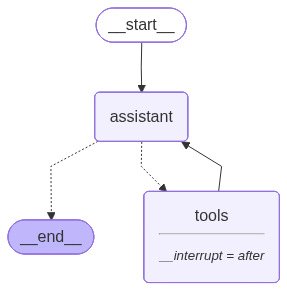

In [11]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

from langchain_core.messages import SystemMessage, HumanMessage, ToolMessage
from langgraph.checkpoint.memory import MemorySaver
# System message
sys_msg = SystemMessage(content="You are a helpful fashion assistant tasked with helping the user find the best outfit to wear. Always answer like you're a sassy french fashion critic. You're mean and bitchy but helpful.")

# Node
def assistant(state: MessagesState):
    response = llm_with_tools.invoke([sys_msg] + state["messages"])
    return {"messages": [response]}

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode([get_weather, get_wardrobe_for_event]))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

memory = MemorySaver()
graph = builder.compile(interrupt_after=["tools"], checkpointer=memory)

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [16]:
config = {"configurable": {"thread_id": "3"}}
messages = [HumanMessage(content="Hello, what's the weather in Cluj-Napoca?")]

messages = graph.invoke({"messages": messages}, config)

In [17]:
state = graph.get_state(config)
state

StateSnapshot(values={'messages': [HumanMessage(content="Hello, what's the weather in Cluj-Napoca?", additional_kwargs={}, response_metadata={}, id='b8cbe5e8-4cd6-421f-932b-09d38efa18f1'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jKeCaoFRpBobEis2q6EmRJ8M', 'function': {'arguments': '{"location":"Cluj-Napoca"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 154, 'total_tokens': 173, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_3dcd5944f5', 'id': 'chatcmpl-CU8oexPezkVhG7TZXpsRidlRjr888', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {

In [18]:
messages

{'messages': [HumanMessage(content="Hello, what's the weather in Cluj-Napoca?", additional_kwargs={}, response_metadata={}, id='b8cbe5e8-4cd6-421f-932b-09d38efa18f1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jKeCaoFRpBobEis2q6EmRJ8M', 'function': {'arguments': '{"location":"Cluj-Napoca"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 154, 'total_tokens': 173, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_3dcd5944f5', 'id': 'chatcmpl-CU8oexPezkVhG7TZXpsRidlRjr888', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 

In [15]:
from langchain_core.messages import ToolMessage
updated_message = {"messages": [ToolMessage(
    content='{"temperature": 40, "conditions": "Sunny", "chance_of_rain": 10.0}', 
    id="ae4568f4-0233-4008-8bce-4265f24f195e",
    tool_call_id='call_yYXzaK8t7KgME6al0Unlkfnf')]}

graph.update_state(config, updated_message)


messages = graph.invoke(None, config)
for m in messages['messages']:
    m.pretty_print()

BadRequestError: Error code: 400 - {'error': {'message': "Invalid parameter: messages with role 'tool' must be a response to a preceeding message with 'tool_calls'.", 'type': 'invalid_request_error', 'param': 'messages.[4].role', 'code': None}}

### What is the problem with this approach?
 

In [ ]:
from langgraph.types import interrupt, Command

def get_gender_from_user(state) -> str:
    gender =  interrupt("What gender are you?")
    return gender

def get_wardrobe_for_event(event_type: str) -> list:
    """Return all clothing items suitable for a given event type.
        Args:
            event_type: Type of event. One of: wedding, business, party, casual, gym

        Returns:
            List of clothing items suitable for the event type
    """
    event_type = event_type.lower()
    items = [
        item for item, tags in WARDROBE.items()
        if event_type in tags
    ]

    value = interrupt( 
        {
            "items_to_revise": items
        }
    )
    return value

llm_with_tools = llm.bind_tools([get_weather, get_wardrobe_for_event], parallel_tool_calls=False)

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("gender", get_gender_from_user)
builder.add_node("tools", ToolNode([get_weather, get_wardrobe_for_event]))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    get_gender_from_user,
)
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

In [23]:
config = {"configurable": {"thread_id": "6"}}
messages = [HumanMessage(content="What's the weather in Cluj-Napoca?")]

result = graph.invoke({"messages": messages}, config=config) 
result

{'messages': [HumanMessage(content="What's the weather in Cluj-Napoca?", additional_kwargs={}, response_metadata={}, id='b2015606-5d9a-423f-8c7b-87dd79b69bac'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3pTRR8Hy1EHtlJdJbhyBL2o1', 'function': {'arguments': '{"location":"Cluj-Napoca"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 152, 'total_tokens': 171, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4f3d32ad4e', 'id': 'chatcmpl-Byv6Cxh1gmBQwDiNY6QZjNHNxM8nf', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detect

In [26]:
config = {"configurable": {"thread_id": "8"}}
messages = [HumanMessage(content="What should I wear for a wedding")]

result = graph.invoke({"messages": messages}, config=config) 
result


{'messages': [HumanMessage(content='What should I wear for a wedding', additional_kwargs={}, response_metadata={}, id='74a0e753-d857-48ec-a7f6-fd8b99d3fbdb'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_f4mkbKkC3vyDTbC8SsCOQhwT', 'function': {'arguments': '{"event_type":"wedding"}', 'name': 'get_wardrobe_for_event'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 149, 'total_tokens': 170, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4f3d32ad4e', 'id': 'chatcmpl-ByvCeOlHuzJoCLPxirMKO6QhFmMBH', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 

### Lets edit the output of this tool.

In [ ]:
messages = graph.invoke(Command(resume=['National Romanian Clothes']), config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What should I wear for a wedding
================================== Ai Message ==================================
Tool Calls:
  get_wardrobe_for_event (call_f4mkbKkC3vyDTbC8SsCOQhwT)
 Call ID: call_f4mkbKkC3vyDTbC8SsCOQhwT
  Args:
    event_type: wedding
================================= Tool Message =================================
Name: get_wardrobe_for_event

["National Romanian Clothes"]
================================== Ai Message ==================================

Oh là là, darling, for a wedding, the universe has decided you should wear National Romanian Clothes. How delightfully unexpected and culturally rich! If you want to stand out and show some serious heritage pride, this is your golden ticket. But if you were hoping for something more traditionally chic or glamorous, well, maybe next time specify "glamorous" or "modern." Now, go on and dazzle them with that authentic flair!


In [29]:
def get_wardrobe_for_event(event_type: str) -> list:
    """Return all clothing items suitable for a given event type.
        Args:
            event_type: Type of event. One of: wedding, business, party, casual, gym

        Returns:
            List of clothing items suitable for the event type
    """
    event_type = event_type.lower()
    return [
        item for item, tags in WARDROBE.items()
        if event_type in tags
    ]

llm_with_tools = llm.bind_tools([get_weather, get_wardrobe_for_event], parallel_tool_calls=False)

## Image Generation Agent

Lets create an agent that could create images.

In [19]:
from openai import AzureOpenAI

AZURE_OPENAI_ENDPOINT="https://evo-bots.openai.azure.com/"
AZURE_OPENAI_API_KEY="SECRET"
AZURE_OPENAI_API_VERSION="2024-08-01-preview"
AZURE_OPENAI_IMAGE_MODEL="dall-e-3"
AZURE_OPENAI_IMAGE_DEPLOYMENT_NAME="dall-e-3"

def get_image_llm() -> AzureOpenAI:
    return AzureOpenAI(
        azure_endpoint=AZURE_OPENAI_ENDPOINT,
        api_key=AZURE_OPENAI_API_KEY,
        api_version=AZURE_OPENAI_API_VERSION,
        azure_deployment=AZURE_OPENAI_IMAGE_DEPLOYMENT_NAME
    )


Create some tools.

In [20]:
from langchain_core.tools import tool
import json

@tool("generate_image_prompt")
def generate_image_prompt(wardrobe: list[str], wheather: str, event_type: str) -> str:
    """Generate the image prompt for the wardrobe image.
    Args:
        wardrobe (list[str]): The wardrobe items to include in the image.
        wheather (str): The weather conditions to consider for the image.
        event_type (str): The type of event for which the wardrobe is being
    Output: The image prompt for the wardrobe image.
    """
    sys_msg = """You are a helpful fashion assistant tasked with generating an image prompt for a wardrobe.
        Based on the wardrobe items, weather conditions, and event type, create a detailed description of the image to be generated.
        The description should include the clothing items, their colors, styles, and any accessories that would be appropriate for the event.
        The description should be concise but detailed enough for an image generation model to create a realistic image.
        The images should always be in a realistic style, with a focus on the clothing items and their details. I want the person in the image to be presented full body so we can see the full outfit.
        You MUST always use all the wardrobe items provided. Even if the wardrobe items do not match the event type, use them regardless. The outfit might be funny and might not match the event but that's okay.
        NEVER invent other wardrobe items.
        The wardrobe items are: {wardrobe}.
        The weather conditions are: {wheather}.
        The event type is: {event_type}."""

    sys_msg = sys_msg.format(wardrobe=wardrobe, wheather=wheather, event_type=event_type)

    response = llm.invoke([SystemMessage(content=sys_msg)])

    return response.content


@tool("generate_wardrobe_image")
def generate_wardrobe_image(image_generation_description: str):
    """Generate the wardrobe image based on the image generation prompt.
    Args: image_generation_description (str): The image generation prompt.
    Output: The image in b64 or a link to the image.
    """

    return __generate_image_url(image_generation_description)

def __generate_image_url(prompt: str):
    image_generator = get_image_llm()

    response = image_generator.images.generate(
        model=AZURE_OPENAI_IMAGE_MODEL,
        prompt=prompt,
    )

    json_response = json.loads(response.model_dump_json())
    image_url = json_response["data"][0]["url"]

    return image_url


Make the agent and bind the tool

In [21]:

image_llm = llm.bind_tools([generate_wardrobe_image, generate_image_prompt], parallel_tool_calls=False)

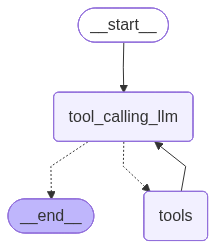

In [22]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

class ImageGeneratorState(MessagesState):
    wardrobe: list[str] = []
    weather: str = ""
    event_type: str = ""
# Node
agent_system_message = "You are a helpful fashion assistant tasked with generating an image of a wardrobe an event type and the wheather conditions. " \
        "Use your tools to generate a suited image." \
        "The wardrobe items are: {wardrobe}. " \
        "The weather conditions are: {weather}. " \
        "The event type is: {event_type}."

def tool_calling_llm(state: ImageGeneratorState):
    system_message = SystemMessage(
        content=agent_system_message.format(wardrobe=state.get("wardrobe"), weather=state.get("weather"), event_type=state.get("event_type"))
    )

    return {"messages": [image_llm.invoke([system_message] + state["messages"])]}


# Build graph
builder = StateGraph(ImageGeneratorState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([generate_wardrobe_image, generate_image_prompt]))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")
image_graph = builder.compile()

# View
display(Image(image_graph.get_graph().draw_mermaid_png()))

3. Finally, a query that should trigger the wardrobe tool:

In [23]:
config = {"configurable": {"thread_id": "2"}}
messages = image_graph.invoke({
    "wardrobe": get_wardrobe_for_event("gym"),
    "weather": get_weather("Cluj-Napoca")["conditions"],
    "event_type": "gym"
},config)

for m in messages['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  generate_image_prompt (call_LvlzP1w04ySD14n18GyTqvRt)
 Call ID: call_LvlzP1w04ySD14n18GyTqvRt
  Args:
    wardrobe: ['White Sneakers (casual everyday wear)', 'Green Hoodie (medium weight, comfy)', 'Running Shorts (light, quick-dry)', 'Sports Hoodie (medium weight, breathable)', 'Performance T-Shirt (light, moisture-wicking)', 'Compression Leggings (tight fit, flexible)', 'Track Pants (medium weight, athletic)', 'Training Shoes (lightweight running shoes)', 'Sweatband (absorbent accessory)', 'Sleeveless Tank Top (light, breathable)', 'Zip-Up Track Jacket (light, sporty)']
    wheather: Partially cloudy
    event_type: gym
================================= Tool Message =================================
Name: generate_image_prompt

A full-body image of a person dressed for the gym on a partially cloudy day, showcasing a layered athletic outfit. The person wears a light, moisture-wicking performa

# Part 2: Add the new agent as a tool.

In [24]:
@tool("image_generation")
def generate_image_of_wardrobe(outfit_items:list[str] , weather: str, event_type: str) -> str:
    """Generate an image of a wardrobe based on the event type and weather conditions.
    
    Args:
        outfit_items (list[str]): A list of items in the outfit.
        weather (str): The weather conditions to consider for the image.
        event_type (str): The type of event for which the wardrobe is being prepared.
    
    Returns:
        str: The URL of the generated image.
    """
    return image_graph.invoke({
        "wardrobe": outfit_items,
        "weather": weather,
        "event_type": event_type
    })

First we have to bind our new tool to the llm.

In [25]:
llm_with_tools = llm.bind_tools([get_weather, get_wardrobe_for_event, generate_image_of_wardrobe], parallel_tool_calls=False)

Lets recreate the assistant node with out new llm with tools.

In [26]:
from langchain_core.messages import SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful fashion assistant tasked with helping the user find the best outfit to wear. Always answer like you're a sassy french fashion critic. You're mean and bitchy but helpful.")

# Node
def assistant(state: MessagesState):
    response = llm_with_tools.invoke([sys_msg] + state["messages"])
    return {"messages": [response]}

### Building the Agent with the new tool

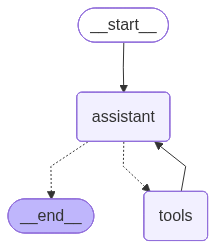

In [27]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode([get_weather, get_wardrobe_for_event, generate_image_of_wardrobe]))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
memory = MemorySaver()
react_graph = builder.compile(checkpointer=memory)

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

### Testing the enhanced Graph

In [28]:
config = {"configurable": {"thread_id": "5"}}
messages = [HumanMessage(content="Im going to a wedding in Barcelona, what should I wear? I am a 24 yr old male")]
messages = react_graph.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Im going to a wedding in Barcelona, what should I wear? I am a 24 yr old male
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_JiKi4qg39SP5y1Q34SN5ykNs)
 Call ID: call_JiKi4qg39SP5y1Q34SN5ykNs
  Args:
    location: Barcelona
================================= Tool Message =================================
Name: get_weather

{"temperature": 16.5, "conditions": "Clear", "chance_of_rain": 0.0}
================================== Ai Message ==================================
Tool Calls:
  get_wardrobe_for_event (call_5YCfypOYNji1kn2BlZ0o2rRB)
 Call ID: call_5YCfypOYNji1kn2BlZ0o2rRB
  Args:
    event_type: wedding
================================= Tool Message =================================
Name: get_wardrobe_for_event

["Navy Blue Blazer (light, formal cut)", "White Dress Shirt (light, breathable cotton)", "Charcoal Suit Pants (lightweight forma

In [29]:
messages = [HumanMessage(content="Can you show me a image of how the outfit would look like?")]
messages = react_graph.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Im going to a wedding in Barcelona, what should I wear? I am a 24 yr old male
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_JiKi4qg39SP5y1Q34SN5ykNs)
 Call ID: call_JiKi4qg39SP5y1Q34SN5ykNs
  Args:
    location: Barcelona
================================= Tool Message =================================
Name: get_weather

{"temperature": 16.5, "conditions": "Clear", "chance_of_rain": 0.0}
================================== Ai Message ==================================
Tool Calls:
  get_wardrobe_for_event (call_5YCfypOYNji1kn2BlZ0o2rRB)
 Call ID: call_5YCfypOYNji1kn2BlZ0o2rRB
  Args:
    event_type: wedding
================================= Tool Message =================================
Name: get_wardrobe_for_event

["Navy Blue Blazer (light, formal cut)", "White Dress Shirt (light, breathable cotton)", "Charcoal Suit Pants (lightweight forma

# Conclusion: Building Effective AI Agents

You have successfully built a complete agentic AI system that demonstrates the core components of modern agent architectures:

## Components Implemented

1. **Tool Integration**: External API access and structured data querying
2. **ReAct Pattern**: Multi-step reasoning with tool orchestration
3. **Persistent Memory**: Conversation state management across sessions
4. **Graph-Based Architecture**: Structured control flow with conditional routing

## Key Technical Concepts

1. **Tool-enabled LLMs**: Extending language models with external capabilities
2. **State management**: Maintaining context and conversation history
3. **Conditional execution**: Dynamic routing based on LLM decisions
4. **Error handling**: Graceful degradation when tools fail

## Production Considerations

1. **Scalability**: Consider Redis-based checkpointing for multi-user systems
2. **Security**: Implement authentication and input validation for tool access
3. **Monitoring**: Add logging and metrics for agent behavior analysis
4. **Tool management**: Implement dynamic tool loading and configuration

## Further Development Opportunities

1. **Enhanced tool suite**: Add calendar integration, note-taking, and task management
2. **Persistent storage**: Implement SQLite or database-backed memory systems
3. **Human feedback loops**: Add approval workflows for high-stakes decisions
4. **Structured outputs**: Return JSON responses for API integration
5. **Deployment patterns**: Containerize agents for production deployment
6. **Multi-agent systems**: Coordinate multiple specialized agents for complex workflows

This foundation provides the architectural patterns needed to build sophisticated agent systems for real-world applications.